In [1]:
import pandas as pd
import numpy as np

# Getting the data

Data sources: Transshipment data annoted with data collected via the Glass Ship app.

In [2]:
# get data from https://github.com/GlobalFishingWatch/paper-identifying-global-patterns-of-transshipment
df = pd.read_csv('transshipment_vessels_20180723.csv')
df.head()

,mmsi,shipname,callsign,fleet_iso3,fleet_name,imo
0,273354560.0,NAGORSK,UBLI8,RUS,Russia,8708000.0
1,273813900.0,LUCHEZARNYY,UHGT,RUS,Russia,7941813.0
2,353901000.0,HONG YING,H90Q,PAN,Panama,9097056.0
3,441723000.0,SAEHAN STELLAR,DSML2,KOR,South Korea,9016698.0
4,677058600.0,LIAO CHANG LENG 9,5IM686,CHN,China,8933083.0


In [3]:
(df.groupby(['fleet_name']).agg(['count']))

,mmsi,shipname,callsign,fleet_iso3,imo
,count,count,count,count,count
fleet_name,,,,,
Barbados,2,2,2,2,2
Belize,20,21,20,21,20
Bermuda,1,1,1,1,1
Cambodia,19,20,19,20,20
Canada,3,3,2,3,2
Cayman Islands,3,3,3,3,3
Chile,4,4,4,4,4
China,57,65,52,65,48


## Add collected data

Here we add data, for now random with normal distribution

In [4]:
df['injuries'] = np.random.normal(loc = 15.0,scale=5, size=len(df))

In [5]:
df['abandons'] = np.random.normal(loc = 10.0,scale=3, size=len(df))

In [6]:
df['missing_persons'] = np.random.normal(loc = 5.0,scale=1, size=len(df))

In [7]:
df['food_rating'] = np.random.normal(loc = 2.0,scale=0.5, size=len(df))
df['water_rating'] = np.random.normal(loc = 2.5,scale=0.5, size=len(df))
df['bedding_rating'] = np.random.normal(loc = 1.5,scale=0.4, size=len(df))
df['health_rating'] = np.random.normal(loc = 2.0,scale=0.2, size=len(df))
df['wage_rating'] = np.random.normal(loc = 3.0,scale=0.5, size=len(df))

In [8]:
df.describe()

,mmsi,imo,injuries,abandons,missing_persons,food_rating,water_rating,bedding_rating,health_rating,wage_rating
count,1.070000e+03,1.071000e+03,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,3.956385e+08,8.618673e+06,14.955171,10.074758,4.988074,2.010382,2.510683,1.514178,1.997070,2.999740
std,1.330097e+08,6.170575e+05,4.916470,2.910267,0.961920,0.512280,0.511047,0.405656,0.196836,0.506131
min,5.004000e+03,5.007510e+06,-1.560950,-1.452530,2.042089,0.355334,0.742661,0.036868,1.382912,1.601688
25%,2.738432e+08,8.225723e+06,11.715086,8.227301,4.324022,1.667597,2.151223,1.241369,1.869417,2.665110
50%,3.569255e+08,8.807662e+06,14.876465,10.095430,4.991527,2.020313,2.478289,1.514537,1.988116,2.981335
75%,5.141800e+08,9.047270e+06,18.264260,12.123983,5.651368,2.368510,2.857335,1.807034,2.124271,3.350649
max,9.927244e+08,9.821134e+06,31.514074,19.137691,8.900052,3.550382,4.033964,2.985325,2.633509,4.471684


In [9]:
df['danger_index'] = np.random.normal(loc = 5.0,scale=1, size=len(df))

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

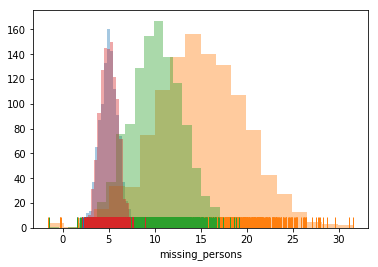

In [11]:
sns.distplot(df.danger_index, bins=20, kde=False, rug=True)
sns.distplot(df.injuries, bins=20, kde=False, rug=True)
sns.distplot(df.abandons, bins=20, kde=False, rug=True)
sns.distplot(df.missing_persons, bins=20, kde=False, rug=True)

In [13]:
# creating dummy variables for the columns that were objects
data_dummies = pd.get_dummies(df[['fleet_name']])
#add numerical columns and drop "article_id(column 0)  & city (column 4) & state (column 5)
pan = df.drop(df.columns[[0,1,2,3, 4,5]], axis=1)
pan = pd.concat([pan, data_dummies], axis=1)
pan.head()

,injuries,abandons,missing_persons,food_rating,water_rating,bedding_rating,health_rating,wage_rating,danger_index,fleet_name_Barbados,...,fleet_name_South Korea,fleet_name_Spain,fleet_name_Taiwan,fleet_name_Tanzania,fleet_name_Thailand,fleet_name_The Bahamas,fleet_name_Togo,fleet_name_Ukraine,fleet_name_United States,fleet_name_Vanuatu
0,17.434739,6.920351,4.719124,2.559380,2.811987,1.675593,1.803807,3.509690,5.801865,0,...,0,0,0,0,0,0,0,0,0,0
1,17.865669,7.388206,3.547925,1.703492,3.329455,0.981273,1.981034,2.913557,6.688726,0,...,0,0,0,0,0,0,0,0,0,0
2,3.437020,14.295310,6.266473,2.656794,1.978025,1.089539,1.878769,3.091859,4.548870,0,...,0,0,0,0,0,0,0,0,0,0
3,17.817097,16.328378,2.789709,2.179033,2.744755,1.517047,1.693507,2.899889,5.055996,0,...,1,0,0,0,0,0,0,0,0,0
4,12.737918,8.133577,4.814496,1.921721,2.670590,1.549926,2.394223,2.562209,5.836606,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
corr_matrix=pan.corr()

In [15]:
corr_matrix['danger_index'].sort_values(ascending=False)

danger_index                                   1.000000
fleet_name_The Bahamas                         0.053756
fleet_name_Federated States of Micronesia      0.050399
fleet_name_Taiwan                              0.048101
fleet_name_Ukraine                             0.041267
fleet_name_United States                       0.037723
fleet_name_Comoros                             0.032124
fleet_name_Cayman Islands                      0.028404
fleet_name_Cambodia                            0.027886
fleet_name_Colombia                            0.027345
fleet_name_Kiribati                            0.026334
fleet_name_Malta                               0.024668
fleet_name_Norway                              0.021105
health_rating                                  0.020856
fleet_name_Saudi Arabia                        0.018772
missing_persons                                0.018767
wage_rating                                    0.018261
fleet_name_Saint Kitts and Nevis               0

# Trainining Linear Models and Predicting the Danger Index of a Ship

In [16]:
#calculate rmse for predictions
def get_rmse(y_test, predictions, model, data):
    from sklearn.metrics import mean_squared_error
    lin_mse = mean_squared_error(y_test, predictions)
    lin_rmse = np.sqrt(lin_mse)
    print("------")
    print("Model: "+model)
    print("Data:  "+data)
    print("MSE:  {}".format(lin_mse))
    print("RMSE: {}".format(lin_rmse))
    lin_rmse

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = pan.drop('danger_index', axis = 1)
y = pan['danger_index']

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#predict on test data
predictions = model.predict(X_test)
#predict on train data
predictions_train = model.predict(X_train)
get_rmse(y_test, predictions, "Linear Regression", "Test split")
get_rmse(y_train, predictions_train, "Linear Regression", "Train split")

------
Model: Linear Regression
Data:  Test split
MSE:  1.0982870667557545
RMSE: 1.0479919211309572
------
Model: Linear Regression
Data:  Train split
MSE:  0.9587828814076406
RMSE: 0.9791745918923962


In [19]:
y.describe()

count    1121.000000
mean        4.999328
std         1.010340
min         1.523455
25%         4.350546
50%         5.003656
75%         5.670441
max         8.076620
Name: danger_index, dtype: float64

(array([ 1.,  8., 18., 32., 49., 56., 24., 23., 10.,  4.]),
 array([2.22249521, 2.77970566, 3.33691611, 3.89412656, 4.45133701,
        5.00854746, 5.5657579 , 6.12296835, 6.6801788 , 7.23738925,
        7.7945997 ]),
 <a list of 10 Patch objects>)

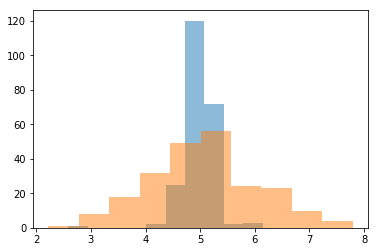

In [20]:
#plotting predictions and data
import matplotlib.pyplot as plt
plt.hist(predictions, alpha=0.5)
plt.hist(y_test, alpha=0.5)

In [21]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_tree.fit(X_train, y_train)
#predict on test data
predictions_tree = model_tree.predict(X_test)
#predict on train data - overfitted..
predictions_tree_train = model_tree.predict(X_train)
get_rmse(y_test, predictions_tree, "Decision Tree Regression", "Test split")
get_rmse(y_train, predictions_tree_train, "Decision Tree Regression", "Train split")

------
Model: Decision Tree Regression
Data:  Test split
MSE:  2.0818009456788467
RMSE: 1.4428447406699192
------
Model: Decision Tree Regression
Data:  Train split
MSE:  1.940509730384987e-10
RMSE: 1.3930217982447321e-05


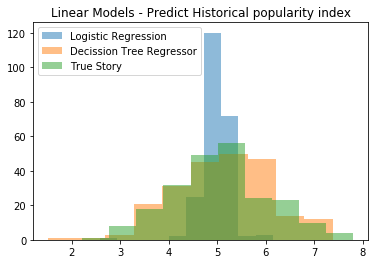

In [22]:
import matplotlib.pyplot as plt
plt.hist(predictions,alpha=0.5,label='Logistic Regression')
plt.hist(predictions_tree,alpha=0.5,label='Decission Tree Regressor')
plt.hist(y_test,alpha=0.5,label='True Story')
plt.title("Linear Models - Predict Historical popularity index")
plt.legend()

In [23]:
#random forest
from sklearn.ensemble import RandomForestRegressor
model_forest = RandomForestRegressor()
model_forest.fit(X_train, y_train)
#predict on test data
predictions_forest = model_forest.predict(X_test)
#predict on train data - overfitted..
predictions_forest_train = model_forest.predict(X_train)
get_rmse(y_test, predictions_forest, "Random Forrest Regression", "Test split")
get_rmse(y_train, predictions_forest_train, "Random Forrest Regression", "Train split")

------
Model: Random Forrest Regression
Data:  Test split
MSE:  1.2585805977930693
RMSE: 1.1218647858779904
------
Model: Random Forrest Regression
Data:  Train split
MSE:  0.22073891774201754
RMSE: 0.4698286046443081


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


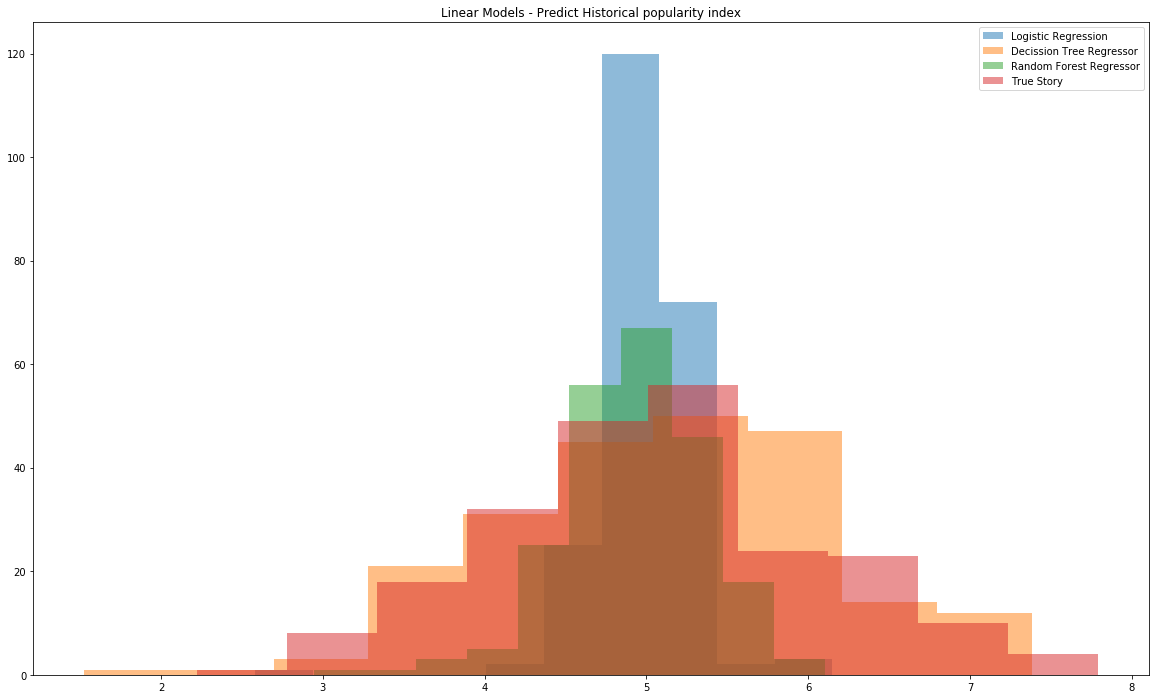

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.hist(predictions,alpha=0.5,label='Logistic Regression')
plt.hist(predictions_tree,alpha=0.5,label='Decission Tree Regressor')
plt.hist(predictions_forest,alpha=0.5,label='Random Forest Regressor')
plt.hist(y_test,alpha=0.5,label='True Story')
plt.title("Linear Models - Predict Historical popularity index")
plt.legend()